# Lung Disease Classification Overlay

This file uses images located in the test folder, and applies an overlay of the predicted classification for each image. Can work with individual images, or a batch of images. 

In [9]:
import os
import cv2
import numpy as np
from keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Load Model and Label Encoder

In [10]:
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)
print(label_encoder.classes_)

['covid' 'normal' 'viral_pneumonia']


In [11]:
model = load_model('Models/CNN+DataGen+Optimal.h5')
print("Model loaded successfully.")

# Load the label encoder
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

Model loaded successfully.


# Apply Mask

In [12]:
def apply_mask(image_array, mask_array):
    # Ensure the mask is binary (0 or 1)
    mask_array = (mask_array > 0).astype(np.float32)
    # Apply the mask
    masked_image = image_array * mask_array
    return masked_image

# Convert images to Greyscale Tensors

In [13]:
def convert_to_grayscale_tensor(folder_path, mask_path, target_size=(256, 256)):
    image_tensors = []
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    mask_files = {f.replace('.png', '.png') for f in os.listdir(mask_path)}  # Assuming masks have the same names as images

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        mask_file = image_file.replace('.png', '.png')
        mask_path_full = os.path.join(mask_path, mask_file)
        
        # Load and preprocess the image
        image = load_img(image_path, color_mode='grayscale', target_size=target_size)
        image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
        
        if mask_file in mask_files:
            mask = load_img(mask_path_full, color_mode='grayscale', target_size=target_size)
            mask_array = img_to_array(mask) / 255.0  # Normalize pixel values to [0, 1]
            image_array = apply_mask(image_array, mask_array)
        
        image_tensor = tf.convert_to_tensor(image_array, dtype=tf.float32)
        image_tensors.append((image_tensor.numpy().flatten(), image_file))  # Flatten the tensor and store the filename
    
    return image_tensors

# Model Classification

In [14]:
def classify_images(image_tensors):
    # Convert the list of flattened tensors back to their original shape
    image_tensors_data = np.array([tensor[0] for tensor in image_tensors]).reshape(-1, 256, 256, 1)  # -1 infers the batch size

    # Make predictions
    predictions = model.predict(image_tensors_data)

    # Get the predicted class indices and probabilities
    class_indices = np.argmax(predictions, axis=1)
    probabilities = np.max(predictions, axis=1)

    # Convert class indices to labels
    predicted_labels = label_encoder.inverse_transform(class_indices)

    # Return the predictions with their probabilities and filenames
    return [(image_tensors[i][1], predicted_labels[i], probabilities[i]) for i in range(len(image_tensors))]

# Apply Prediction and Probability to Images

In [15]:
def overlay_predictions(image_path, label, probability, save_path):
    # Open image
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    
    # Define font and size (you may need to adjust this path based on your system)
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Define the text to overlay
    text = f"Prediction: {label}\nProbability: {probability*100:.2f}%"
    
    # Define text position
    text_position = (0, 0)
    
    # Calculate text size to determine the size of the black box
    bbox = draw.textbbox(text_position, text, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    
    # Define the size and position of the black box
    box_x0, box_y0 = text_position
    box_x1, box_y1 = box_x0 + text_width + 10, box_y0 + text_height + 10  # Smaller padding

    # Draw the black box
    draw.rectangle([box_x0, box_y0, box_x1, box_y1], fill="black")

    # Draw the text on top of the black box
    draw.text((box_x0 + 5, box_y0 + 5), text, font=font, fill="white")  # White text
    
    # Save the image
    image.save(save_path)

1/1 [==============================] - 1s 510ms/step
Image COVID-1.png: Predicted - covid, Probability - 98.26%


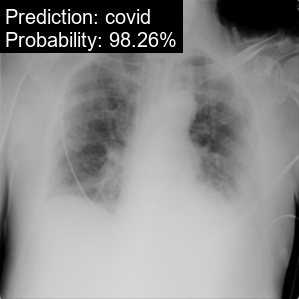

Image Normal-1.png: Predicted - covid, Probability - 99.53%


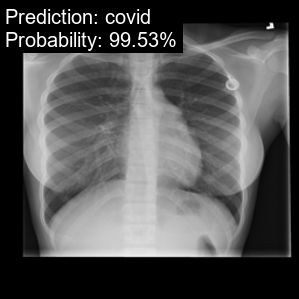

Image Viral Pneumonia-1.png: Predicted - viral_pneumonia, Probability - 99.97%


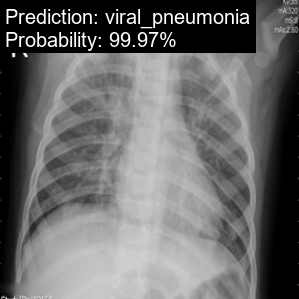

Image Viral Pneumonia-10.png: Predicted - viral_pneumonia, Probability - 99.99%


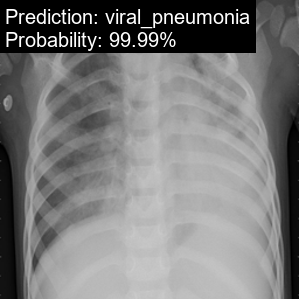

Image Viral Pneumonia-11.png: Predicted - viral_pneumonia, Probability - 96.80%


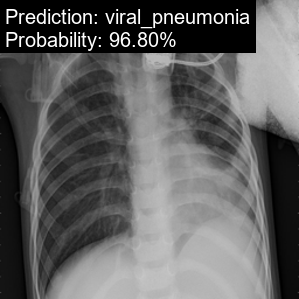

Image Viral Pneumonia-12.png: Predicted - viral_pneumonia, Probability - 93.98%


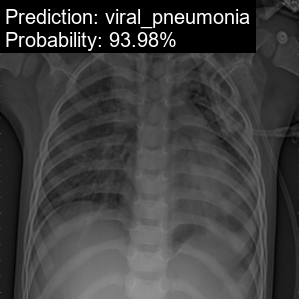

Image Viral Pneumonia-13.png: Predicted - viral_pneumonia, Probability - 99.91%


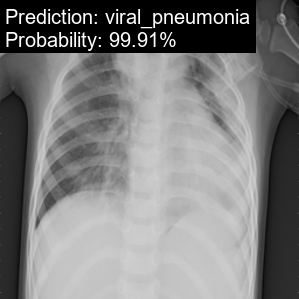

Image Viral Pneumonia-14.png: Predicted - viral_pneumonia, Probability - 99.47%


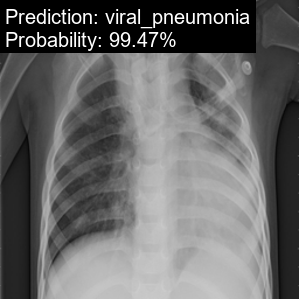

Image Viral Pneumonia-15.png: Predicted - covid, Probability - 62.67%


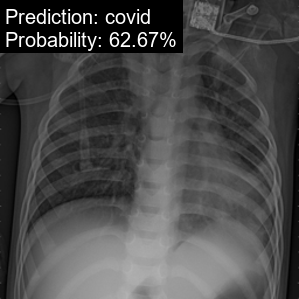

Image Viral Pneumonia-16.png: Predicted - viral_pneumonia, Probability - 99.92%


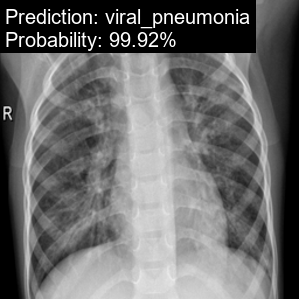

Image Viral Pneumonia-17.png: Predicted - viral_pneumonia, Probability - 51.31%


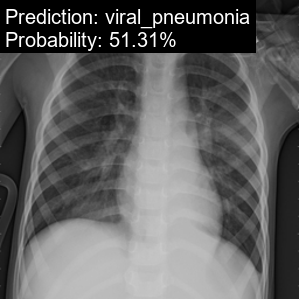

Image Viral Pneumonia-18.png: Predicted - viral_pneumonia, Probability - 64.43%


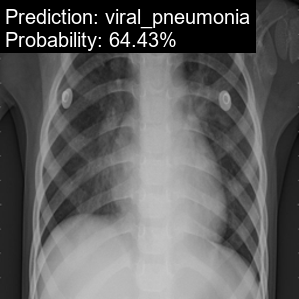

Image Viral Pneumonia-19.png: Predicted - viral_pneumonia, Probability - 100.00%


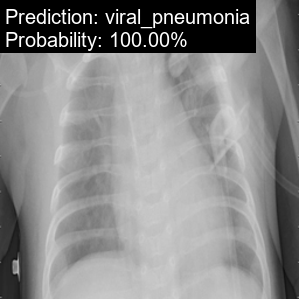

Image Viral Pneumonia-2.png: Predicted - viral_pneumonia, Probability - 99.99%


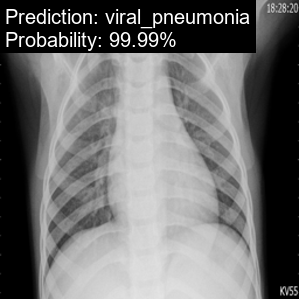

Image Viral Pneumonia-20.png: Predicted - viral_pneumonia, Probability - 99.99%


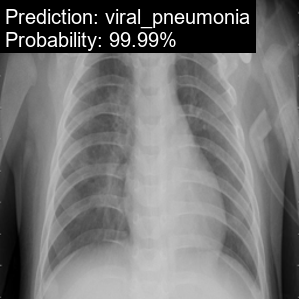

Image Viral Pneumonia-21.png: Predicted - viral_pneumonia, Probability - 99.18%


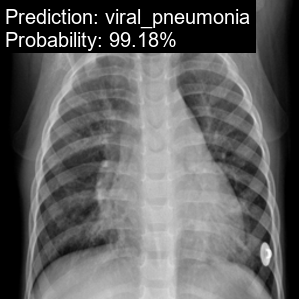

Image Viral Pneumonia-22.png: Predicted - viral_pneumonia, Probability - 100.00%


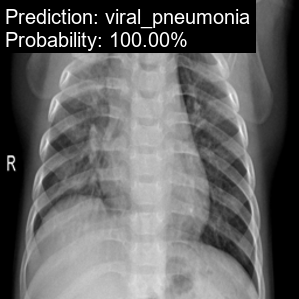

Image Viral Pneumonia-23.png: Predicted - viral_pneumonia, Probability - 98.03%


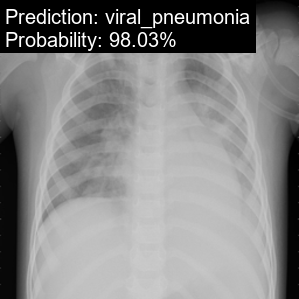

Image Viral Pneumonia-24.png: Predicted - viral_pneumonia, Probability - 98.10%


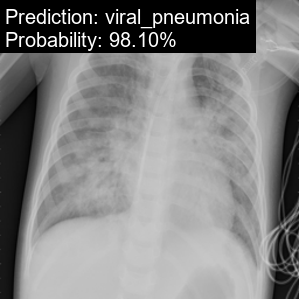

Image Viral Pneumonia-3.png: Predicted - viral_pneumonia, Probability - 60.05%


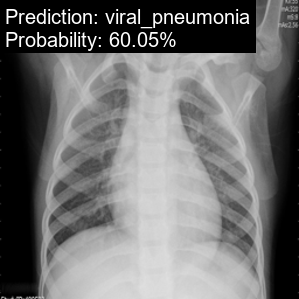

Image Viral Pneumonia-4.png: Predicted - viral_pneumonia, Probability - 99.77%


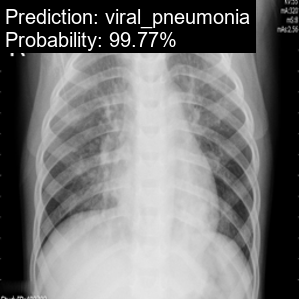

Image Viral Pneumonia-5.png: Predicted - viral_pneumonia, Probability - 99.30%


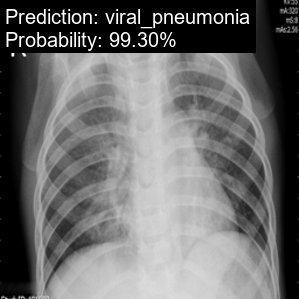

Image Viral Pneumonia-6.png: Predicted - viral_pneumonia, Probability - 99.98%


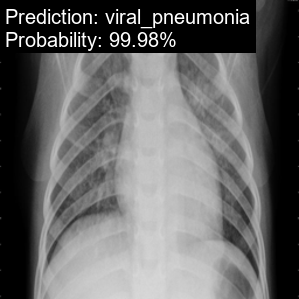

Image Viral Pneumonia-7.png: Predicted - viral_pneumonia, Probability - 99.63%


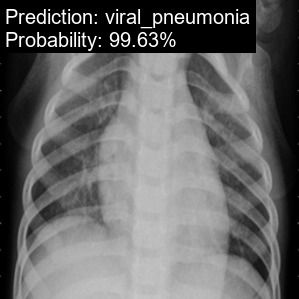

Image Viral Pneumonia-8.png: Predicted - viral_pneumonia, Probability - 99.06%


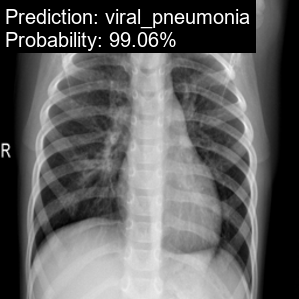

Image Viral Pneumonia-9.png: Predicted - covid, Probability - 88.93%


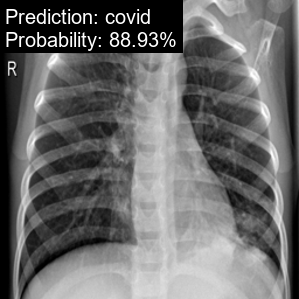

In [16]:
def main():
    image_folder_path = 'test/images'
    mask_folder_path = 'test/masks'
    result_folder = 'test_results'
    
    # Create the result folder if it does not exist
    if not os.path.exists(result_folder):
        os.makedirs(result_folder)
    
    # Convert images to tensors and apply masks
    image_tensors = convert_to_grayscale_tensor(image_folder_path, mask_folder_path)
    
    # Classify images
    predictions = classify_images(image_tensors)
    
    # Overlay predictions and save images
    for image_file, label, probability in predictions:
        image_path = os.path.join(image_folder_path, image_file)
        save_path = os.path.join(result_folder, image_file)
        overlay_predictions(image_path, label, probability, save_path)
        print(f"Image {image_file}: Predicted - {label}, Probability - {probability*100:.2f}%")
        
        # Display the image with prediction in the notebook
        result_image = Image.open(save_path)
        display(result_image)

if __name__ == "__main__":
    main()